# Exploratory Data Analysis and Pre-processing

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('./data/dataset_open_food.csv', delimiter='\t')

/home/jalilm/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#df.to_pickle("./food.pkl")

**Comments:**<br>
_Here we start our exploratory data analysis of the Open Food Facts Database.
The first step of our study is to compute the null columns, and the repartition of the different columns. 
Hence, we can already describe our dataset by computing the mean, standard deviation and min-max values of the numerical columns._

In [3]:
df.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.005487e+06,1.005487e+06,0.0,0.0,2.775790e+05,0.0,447135.000000,447135.000000,0.0,447135.000000,...,9251.000000,285523.000000,285523.000000,3.000000,0.0,30.000000,3.000000,20.00000,37.000000,15.000000
mean,1.517979e+09,1.540009e+09,NaN,NaN,4.002864e+16,NaN,1.622796,0.027307,NaN,0.071907,...,631.833141,9.218179,8.978320,29.333333,NaN,0.069597,0.120020,4.76000,0.026241,0.046147
std,4.074422e+07,3.132881e+07,NaN,NaN,2.108940e+19,NaN,2.349812,0.164914,NaN,0.316619,...,6864.058481,8.808982,9.272269,15.011107,NaN,0.032266,0.207828,4.24145,0.027702,0.145485
min,0.000000e+00,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000,...,0.049000,-15.000000,-15.000000,14.000000,NaN,0.008000,0.000016,0.40000,0.001350,0.006500
25%,1.489092e+09,1.525286e+09,NaN,NaN,2.800000e+01,NaN,0.000000,0.000000,NaN,0.000000,...,111.000000,2.000000,1.000000,22.000000,NaN,0.054750,0.000031,3.50000,0.006900,0.007050
50%,1.524502e+09,1.552001e+09,NaN,NaN,4.900000e+01,NaN,1.000000,0.000000,NaN,0.000000,...,335.220000,10.000000,9.000000,30.000000,NaN,0.069000,0.000045,4.00000,0.022000,0.008500
75%,1.550147e+09,1.563514e+09,NaN,NaN,1.130000e+02,NaN,2.000000,0.000000,NaN,0.000000,...,617.500000,16.000000,17.000000,37.000000,NaN,0.089000,0.180023,5.20000,0.027600,0.011000
max,1.571617e+09,1.571617e+09,NaN,NaN,1.111111e+22,NaN,38.000000,3.000000,NaN,6.000000,...,656298.600000,40.000000,40.000000,44.000000,NaN,0.130000,0.360000,21.50000,0.150000,0.572000


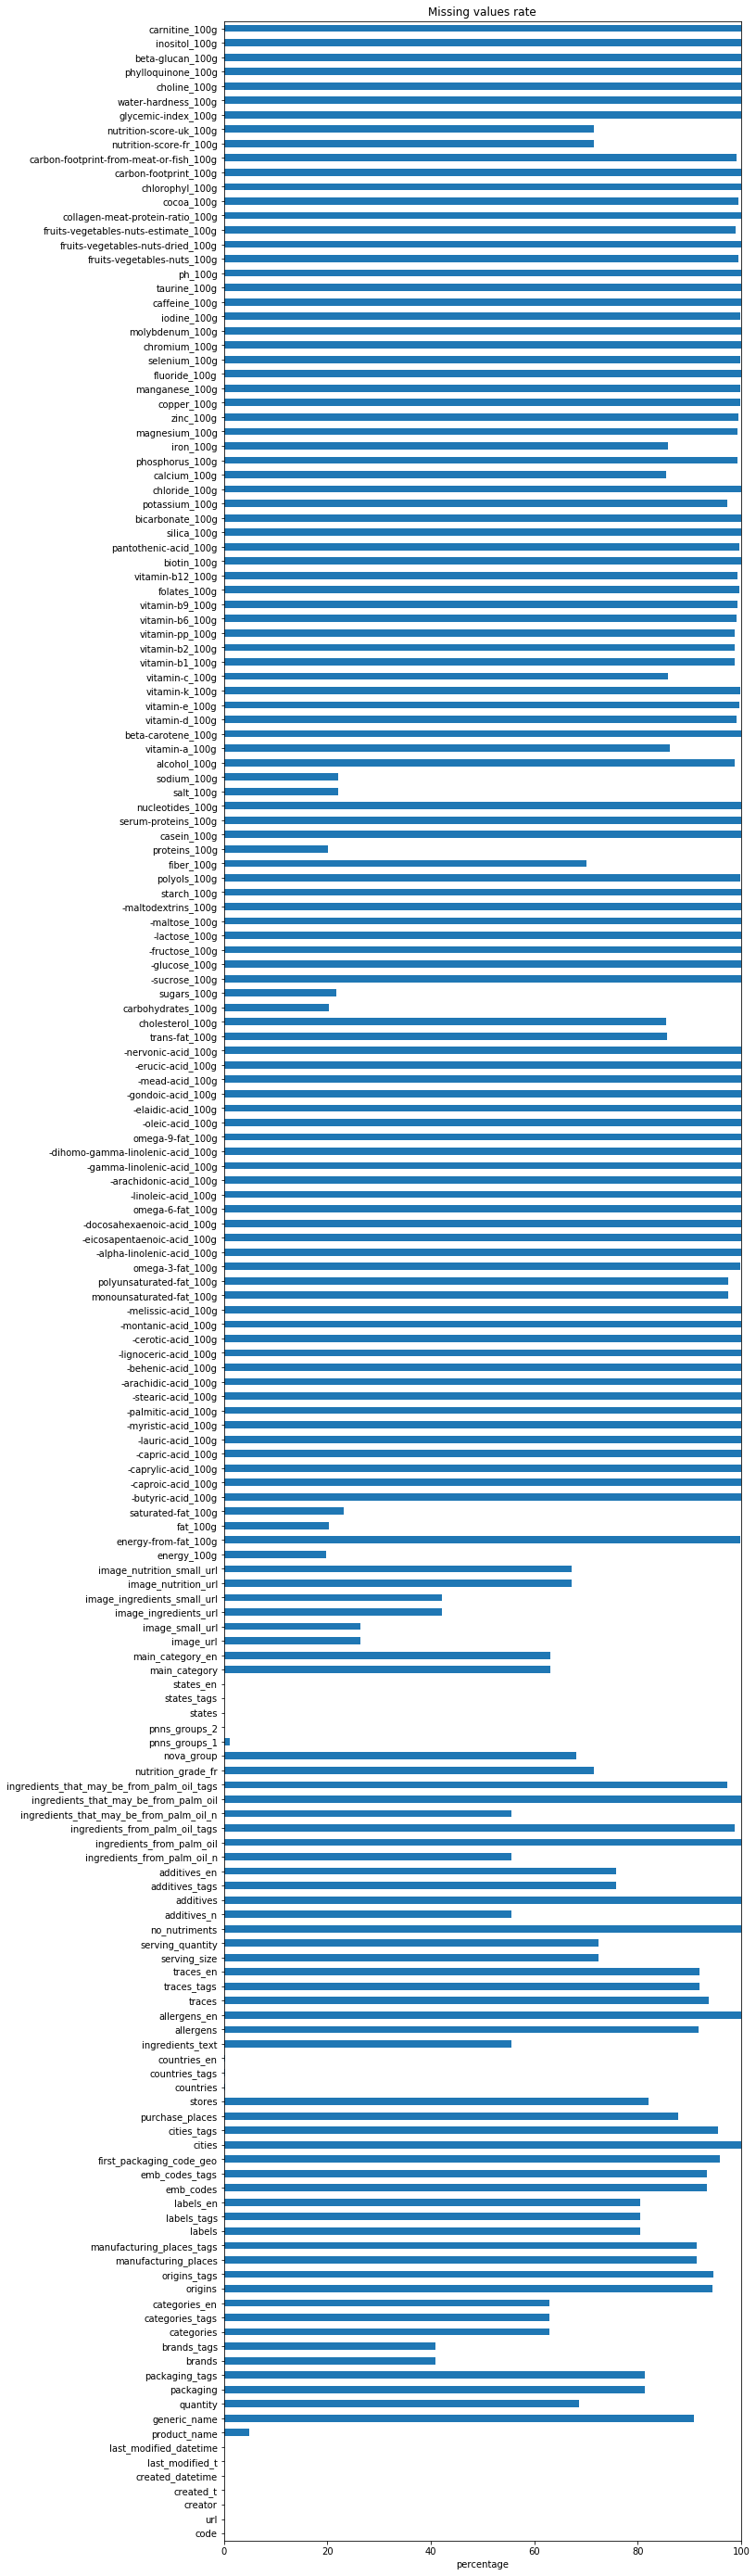

In [3]:
## MODIFICATION HERE ##

plt.figure(figsize=(10, 50))
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('grid')
(df.isnull().mean(axis=0)*100).plot.barh()
plt.xlim(right=100)
plt.title("Missing values rate")
plt.xlabel("percentage")
plt.show();

**Comments:**<br>
_Furthermore, there are some missing values in the dataset. Actually some of these columns are nearly empty, for example the composition columns ("cocoa_100g", "zinc_100g", etc...). But this can easily be explained by the fact that it is impossable to put on every product's label its complete composition._

_Moreover, we can choose to discard features with more than 60% missing values (for instance), because these features are inconsistent. However, we do not want to do that because in the following parts, we are going to discuss some specific aspects of our food activity :_
   - _Additives_
   - _Allergens_
   - _Palm Oil_

_These are some negative aspects of our food consumption, and we are going to study these aspects in regard of the french food nutrition grade (given in many countries).
Specifically, we are going to study the World and US consumptions concerning these aspects._

# Part A : Additives

_In this part, we are going to discuss the effect of the dangerous food additives on its nutrition grade, and consequently our everyday food consumption.<br>
In fact, the nutrition grade is given in the range from "a" to "e" (from best grade to worst grade). But we want to know if the food products with the dangerous additives, or the most additives have good or bad nutrition grades._

_Hence, in order to determine which additives are bad we are going to first use the list in the **"Hungry for Change"** website. This list contains the most dangerous food additives that we can find on the market, but are not forbidden.
This list was collected using different scientific studies on the matter._


_Source:_
http://www.hungryforchange.tv/article/top-10-food-additives-to-avoid)

In [4]:
df_new = df.additives_tags.dropna().map(lambda x : x.lower())
df_e250 = df_new.str.contains('e250')
df_nutrition = df.nutrition_grade_fr
df_both = df.iloc[df_e250.index]

In [5]:
df_both = df_both[['additives_tags', 'nutrition_grade_fr']]

In [6]:
df_both[df_both.nutrition_grade_fr.notnull()].sample(5)

,additives_tags,nutrition_grade_fr
257732,"en:e330,en:e440,en:e440i",c
249435,"en:e101,en:e1100,en:e160b,en:e300,en:e407",d
825449,"en:e330,en:e331,en:e428,en:e903",d
943346,"en:e200,en:e282,en:e300,en:e466,en:e471,en:e47...",b
346495,en:e330,a


In [7]:
order = ['a', 'b', 'c','d','e']

df_result_e250 = pd.DataFrame(df_both.nutrition_grade_fr)

def grade_dist(title, df_dist):
    fig = df_dist.apply(pd.value_counts).loc[order].plot(kind='bar', subplots=True)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.title(title)
    plt.xlabel("Nutrition Grade")
    plt.ylabel("Number of products")
    plt.show();

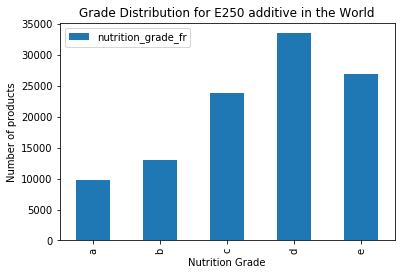

In [8]:
grade_dist("Grade Distribution for E250 additive in the World", df_result_e250)

**Comment**:

_Here we do find the e250 additive (Used for curing(preserving) meat and fish products) which can cause acute methemoglobinemia (haemoglobin loses its ability to carry oxygen), irritability, lack of energy, headache, brain damages or even death in severe untreated cases.
However, what is alarming is that we find many products which have this additive, but keep a "a" and "b" nutrition grade._

_Now, we are going to do the same analysis on a the list given by the "Hungry for Change" website on the world dataset, and on the specific US dataset._

In [9]:
list_dangerous_additives = ['e951','e621', 'e133', 'e124','e110', 'e102', 'e221', 'e320', 'e220']
kwstr = '|'.join(list_dangerous_additives)
mask = df_new.to_frame().stack().str.contains(kwstr).any(level=0)
df_additives = df_new[mask]
df_all = df.iloc[df_additives.index]
df_all = df_all[['additives_tags', 'nutrition_grade_fr']]

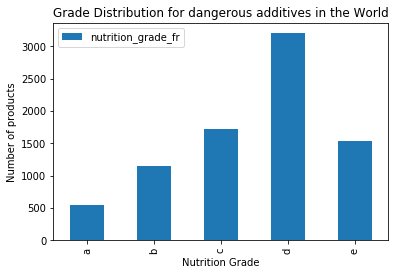

In [10]:
df_result_all = pd.DataFrame(df_all.nutrition_grade_fr)
grade_dist("Grade Distribution for dangerous additives in the World", df_result_all)

In [11]:
df.countries = df.countries.str.lower()

# Fix some of the names with multiple entries
df.loc[df['countries'] == 'en:fr','countries'] = 'france'
df.loc[df['countries'] == 'en:es','countries'] = 'spain'
df.loc[df['countries'] == 'en:gb','countries'] ='united kingdom'
df.loc[df['countries'] == 'en:uk','countries'] ='united kingdom'
df.loc[df['countries'] == 'españa','countries'] ='spain'
df.loc[df['countries'] == 'us','countries'] = 'united states'
df.loc[df['countries'] == 'en:us','countries'] ='united states'
df.loc[df['countries'] == 'usa','countries'] = 'united states'
df.loc[df['countries'] == 'en:cn','countries'] = 'canada'
df.loc[df['countries'] == 'en:au','countries'] = 'australia'
df.loc[df['countries'] == 'en:de','countries'] ='germany'
df.loc[df['countries'] == 'deutschland','countries'] ='germany'
df.loc[df['countries'] == 'en:be','countries'] ='belgium'
df.loc[df['countries'] == 'en:ma','countries'] ='morocco'
df.loc[df['countries'] == 'en:ch','countries'] ='switzerland'

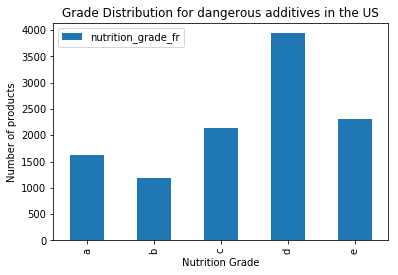

In [12]:
## MODIFICATION HERE (US) ##

us = ['united states']
df_us = df[df.countries.isin(us)]

df_new_us = df_us.additives_tags.dropna().map(lambda x : x.lower())
df_additives_us = df.iloc[df_new_us.index]

df_result_additives_us = pd.DataFrame(df_additives_us.nutrition_grade_fr)
grade_dist("Grade Distribution for dangerous additives in the US", df_result_additives_us)

**Comment**:
_As you can see from the two plots above, is that most of the products (in both the world and the US do have a nutrition grade of "d", which is a pretty bad grade, but is not the worst grade.
Hence, now we can start discussion the impact of many dangerous additives on our food consumption._

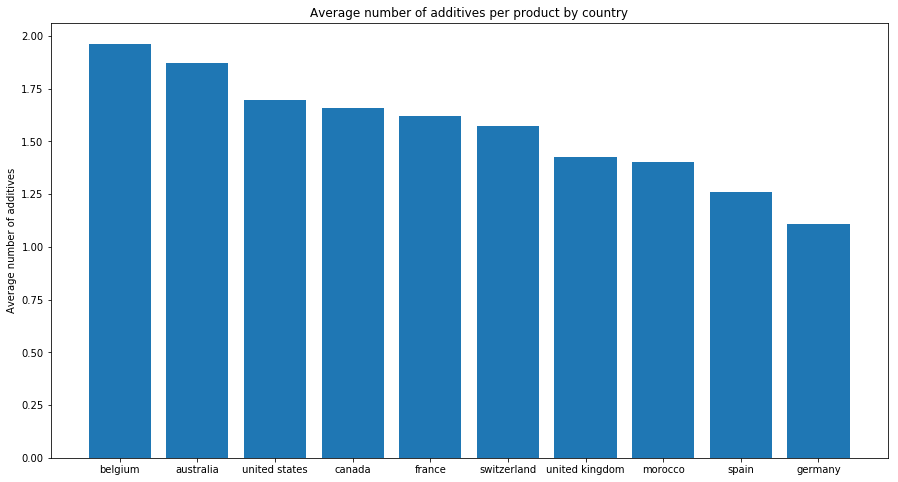

In [13]:
## MODIFICATION HERE ##

countries = ['france','united kingdom','spain','germany','united states','australia','canada', 'belgium', 'morocco', 'switzerland']
df_countries = df[df.countries.isin(countries)]
df_countries_additives = df_countries[df_countries.additives_n.notnull()]
df_groupedby_countries_additives = df_countries_additives.groupby(['countries']).mean().additives_n.reset_index()

np_countries_additives = np.array(df_groupedby_countries_additives)
np_countries_additives = np_countries_additives[np_countries_additives[:,1].argsort()[::-1]]

# Plot the average number of additives per country
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
y_pos = np.arange(len(np_countries_additives[:,0]))
x_pos = np_countries_additives[:,1]
x_ticks = np_countries_additives[:,0]

# Make a barplot
plt.bar(y_pos, x_pos, align='center')
plt.title('Average number of additives per product by country')
plt.xticks(y_pos, x_ticks)
plt.ylabel('Average number of additives') 
plt.show()

**Comments:**<br>

Here, we are ranking 10 countries from our list of countries in the dataset, in order to identify the countries which use the biggest average number of additivs per product.
Normally, this ranking should reflect the food consumption habits and use of additives of its population. <br>
It can be clearly seen that Belgium and Australia use the most additives out of these countries, and spain and germany the least. This also demonstrates the most healthy and unhealthy additives habits of these countries.

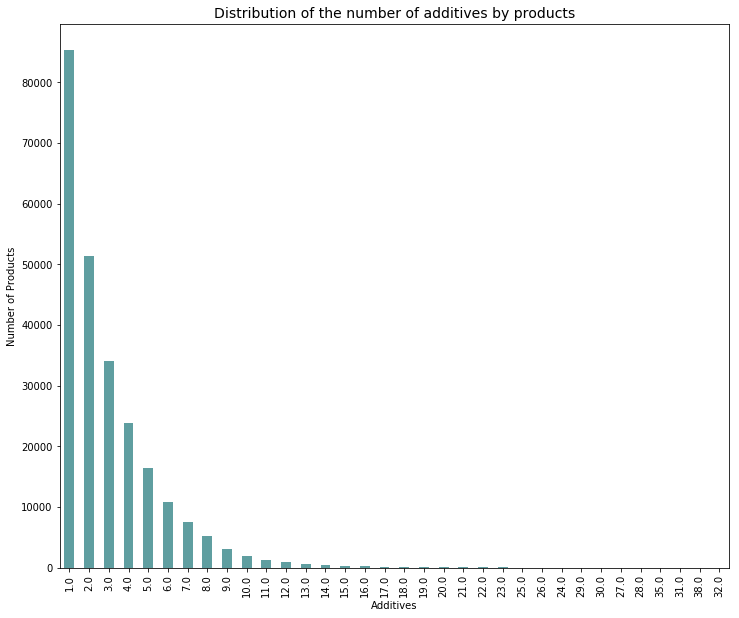

In [14]:
def prod_dist(title, feature, xlabel):
    plt.figure(figsize=(12,10))
    ax = df[df[feature] > 0.0][feature].value_counts().plot(kind='bar',color='cadetblue')
    plt.title(title,fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel('Number of Products')
    plt.show();

prod_dist('Distribution of the number of additives by products','additives_n', 'Additives')

**Comment**: <br>
_This plot shows the distribution of the number of additives by products. It can be clearly seen that most of the products use 1 to 5 additives in their composition. However, what is astonishing is that we do find products with more than 15 additives in total ! Based on our research, the types of additives used are regulated and has to be approved prior to use. However, there is no limitations for the number of additives that can be added to food products._

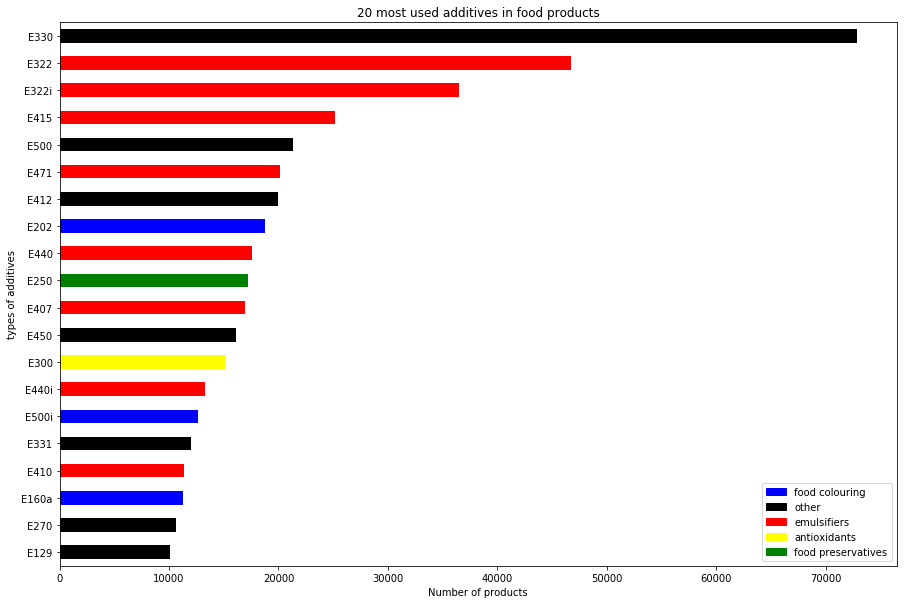

In [15]:
import matplotlib.patches as mpatches

additives = (df['additives_en'].str.extractall("(?P<Count>[E]\d\d\d\w?)"))
additives_count = additives.apply(pd.value_counts).head(20)
additives_count['additives_num'] = additives_count.index
additives_count.reset_index(drop=True,inplace=True)


additives_mapping = {'E330': 'black','E322':'red','E322i':'red','E101':'blue','E375':'black','E101i':'blue',
                    'E300':'yellow','E415':'red','E412':'black','E500':'black','E471':'red','E203':'green','E407':'red',
                    'E440':'red','E250':'green','E150a':'blue','E450':'black','E500i':'blue','E331':'black',
                     'E129':'black','E339':'black','E440i':'red','E160a':'blue','E270':'black','E102':'blue',
                     'E410':'red','E133':'blue','E341':'black','E428':'red','E621':'black','E202':'blue'}

additives_count['colors'] = additives_count['additives_num'].map(additives_mapping)

ax = additives_count.plot(x='additives_num',y='Count',kind='barh',color=additives_count['colors'],figsize=(15,10))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('20 most used additives in food products')

colors = mpatches.Patch(color='blue', label='food colouring')
others = mpatches.Patch(color='black', label='other')
emulsifiers = mpatches.Patch(color='red', label='emulsifiers')
antioxidant = mpatches.Patch(color='yellow', label='antioxidants')
preservatives = mpatches.Patch(color='green', label='food preservatives')

plt.legend(handles=[colors,others,emulsifiers,antioxidant,preservatives])
plt.xlabel('Number of products')
plt.ylabel('types of additives')
plt.show();

**Comment**: <br>
_This is the ranking of the 20 most used additives by number of products, and we distinguish the classes of additives. <br>
In fact, this complete list of dangerous additives and their classes was taken from the World Health Organization and the FDA. And as you can see above, the most dangerous and popular additives in food products are "emulsifiers" (and "other") additives present in more than 100000 products in the dataset._

_Sources:_<br>
https://www.fda.gov/food/food-additives-petitions/food-additive-status-list <br>
https://www.who.int/en/news-room/fact-sheets/detail/food-additives

# Part B : Allergens 

**Comment**:

In this part, we are going to study the impact of allergens on the nutrition grade.<br>
More specifically, this part will also take into consideration the US-special case in order to compare it to the rest of the world.

In [14]:
df_us_allergens = df_us[['nutrition_grade_fr', 'allergens']]
df_allergens_notnull = df.allergens.dropna() 

print('the Shape of the US Dataframe : ', df_us.shape)
print('Number of Allergens Descriptions in the whole Dataframe : ', len(df_allergens_notnull.index))
print('Number of Allergens Descriptions in the US Dataframe : ', len(df_us_allergens.allergens.dropna().index))

the Shape of the US Dataframe :  (176035, 175)
Number of Allergens Descriptions in the whole Dataframe :  82895
Number of Allergens Descriptions in the US Dataframe :  845


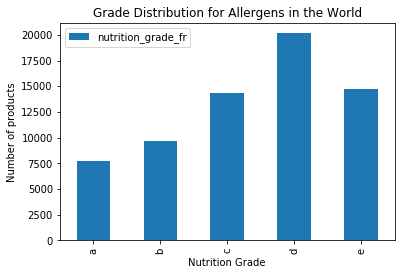

In [15]:
df_new = df.allergens.dropna().map(lambda x : x.lower())
df_allergens = df.iloc[df_new.index]
df_result_allergens = pd.DataFrame(df_allergens.nutrition_grade_fr)
grade_dist("Grade Distribution for Allergens in the World", df_result_allergens)

In [16]:
df_new_null = df.allergens.isnull()
df_allergens_null = df.iloc[df_new_null.index]
df_result_allergens_null = pd.DataFrame(df_allergens_null.nutrition_grade_fr)
grade_dist("Grade Distribution for Non-Allergens in the World", df_result_allergens_null)

MemoryError: 

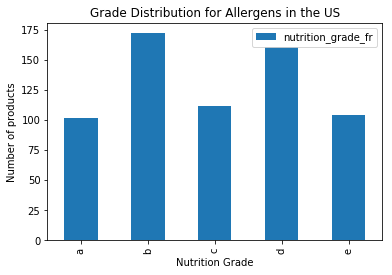

In [20]:
df_new_us = df_us.allergens.dropna().map(lambda x : x.lower())
df_us_allergens = df.iloc[df_new_us.index]
df_result_us_allergens = pd.DataFrame(df_us_allergens.nutrition_grade_fr)
grade_dist("Grade Distribution for Allergens in the US",df_result_us_allergens)


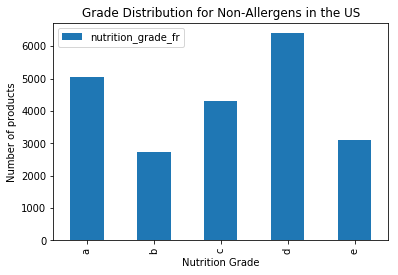

In [22]:
df_new_us_null = df_us.allergens.isnull()
df_us_allergens_null = df.iloc[df_new_us_null.index]
df_result_us_allergens_null = pd.DataFrame(df_us_allergens_null.nutrition_grade_fr)
grade_dist("Grade Distribution for Non-Allergens in the US",df_result_us_allergens_null)

**Comment**:
In this part, we see that for the rest of the world, we have a high distribution of allergens in the worst grades (similar to additives).

However, the distribution of the allergens on the US market, show a total imbalance on the nutrition grade. In fact, we have the same number of products with grade "b" and grade "d". This imbalance can also be explained by the low number of products with "allergens" labels on them. (845 for the US, and 82895 for the rest of the world)
Hence, we can conclude that the impact of the allergens on the US products cannot be proven.

# Part C : Palm Oil

**Comments**:<br>
_Finally, we are going to study the use of palm oil ingredients (or ingredients that may be from palm oil) on the food consumption._

In [25]:
palm_list = ['ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags','nutrition_grade_fr']

df_palm = df[palm_list]
df_us_palm = df_us[palm_list]

print('the number of the Palm Oil products in the whole dataframe : ', len(df_palm.ingredients_from_palm_oil_n.dropna().index))
print('the number of the Palm Oil products in the US dataframe : ', len(df_us_palm.ingredients_from_palm_oil_n.dropna().index))

the number of the Palm Oil products in the whole dataframe :  447135
the number of the Palm Oil products in the US dataframe :  170906


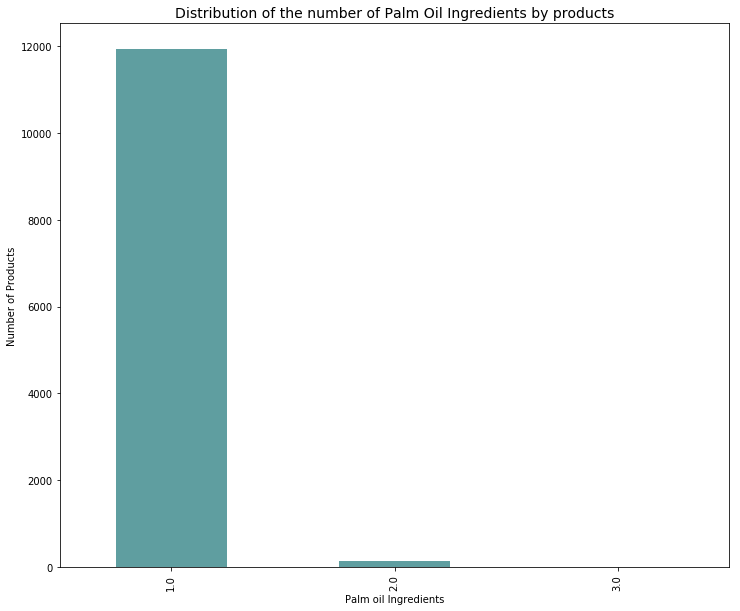

In [26]:
prod_dist('Distribution of the number of Palm Oil Ingredients by products','ingredients_from_palm_oil_n', 'Palm oil Ingredients' )

**Comments**:<br>
_Here we wanted to see the distribution of the number of palm oil ingredients in some of our products (in the world dataset). Hence, most of the products only contain one product containing palm oil. But we do have food products with 3 ingredients containing palm oil, which is inevitably bad for your health._

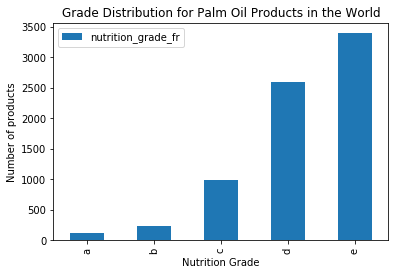

In [27]:
df_new = df.ingredients_from_palm_oil_tags.dropna().map(lambda x : x.lower())
df_palm_ingredients = df.iloc[df_new.index]
df_result_palm = pd.DataFrame(df_palm_ingredients.nutrition_grade_fr)
grade_dist("Grade Distribution for Palm Oil Products in the World",df_result_palm )

/home/jalilm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


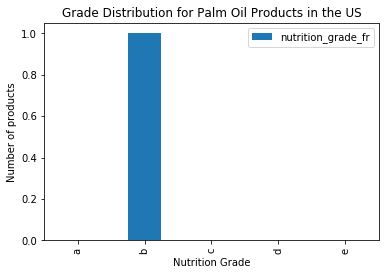

The number of products studied in the US Palm Oil Dataframe is only :  3


In [28]:
df_new_us = df_us.ingredients_from_palm_oil_tags.dropna().map(lambda x : x.lower())
df_palm_us_ingredients = df.iloc[df_new_us.index]
df_result_us_palm = pd.DataFrame(df_palm_us_ingredients.nutrition_grade_fr)
grade_dist("Grade Distribution for Palm Oil Products in the US", df_result_us_palm)

print('The number of products studied in the US Palm Oil Dataframe is only : ', len(df_palm_us_ingredients.index))

In [30]:
df_countries_palm = df_countries[df_countries.ingredients_from_palm_oil_n.notnull()]
df_groupedby_countries_palm = df_countries_palm.groupby(['countries']).mean().ingredients_from_palm_oil_n.reset_index()

np_countries_palm = np.array(df_groupedby_countries_palm)
np_countries_palm = np_countries_palm[np_countries_palm[:,1].argsort()[::-1]]

# Plot the average number of additives per country
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
y_pos = np.arange(len(np_countries_palm[:,0]))
x_pos = np_countries_palm[:,1]
x_ticks = np_countries_palm[:,0]

# Make a barplot
plt.bar(y_pos, x_pos, align='center')
plt.title('Average number of additives per product by country')
plt.xticks(y_pos, x_ticks)
plt.ylabel('Average number of additives') 
plt.show()

MemoryError: 

**Comments**:<br>
_To conclude, we wanted to see the distribution of food products containing palm oil ingredients in regard to the nutrition grade.<br>
Hence, with no surprise, we see that the number of products increase gradually with the negative grades (the most number of products have the worst grade which is "e") in the world dataset.
However, we cannot conclude anything the US dataset because we only have 3 products containing in their labels the "palm oil" tag. This can be explained by the fact that many US lobbies want their products to continue using palm oil without informing the public. (source "The Guardian")_

_Source:_
https://www.theguardian.com/news/2019/feb/19/palm-oil-ingredient-biscuits-shampoo-environmental

# Correlation Between Nutrition Grade (FR) and allergens, additives and palm oil ingredients

In [23]:
sns.set(style="white")

# Generate a large random dataset

list_additives_palm = ['nutrition_grade_fr', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n' ]

def corr_matrix(df_test, title):
    fig = plt.figure(figsize=(20,20))
    df_test_new = df_test[list_additives_palm]
    df_test_new = pd.get_dummies(df_test_new, columns=['nutrition_grade_fr'])
    plt.matshow(df_test_new.corr())
    plt.title(title)
    plt.show();

<Figure size 1440x1440 with 0 Axes>

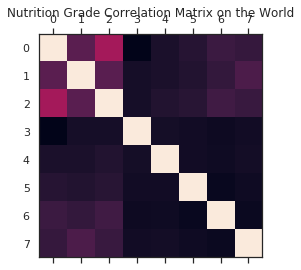

In [24]:
corr_matrix(df, 'Nutrition Grade Correlation Matrix on the World');

<Figure size 1440x1440 with 0 Axes>

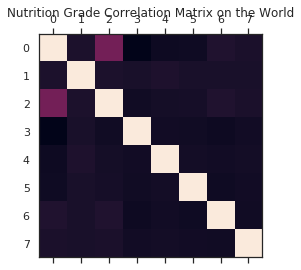

In [25]:
corr_matrix(df_us, 'Nutrition Grade Correlation Matrix on the World')

_Here we wanted to plot the correlation matrices regarding our findings in the 3 previous parts : we only find a correlation between additives and palm oil (0 and 2 columns)._